## A tutorial on statistical-learning for scientific data processing

### Statistical learning: the setting and the estimator object in scikit-learn

#### Datasets

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [6]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

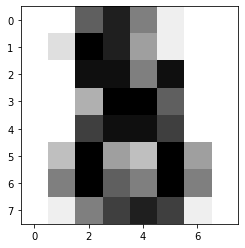

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)
plt.show()

In [9]:
data = digits.images.reshape(
    (digits.images.shape[0], -1)
)
data.shape

(1797, 64)

#### Estimators objects

### Supervised learning: predicting an output variable from high-dimensional observations

#### Nearest neighbor and the curse of dimensionality

In [11]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [12]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [13]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [14]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [15]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

#### The curse of dimensionality

### Linear model: from regression to sparsity

In [16]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [18]:
regr.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [19]:
# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898211

In [20]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574